In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_df = pd.read_csv(f'/content/drive/My Drive/Ecg/mitbih_train.csv',header = None)
test_df = pd.read_csv(f'/content/drive/My Drive/Ecg/mitbih_test.csv',header = None)

In [ ]:
test_df.shape

(21892, 188)

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


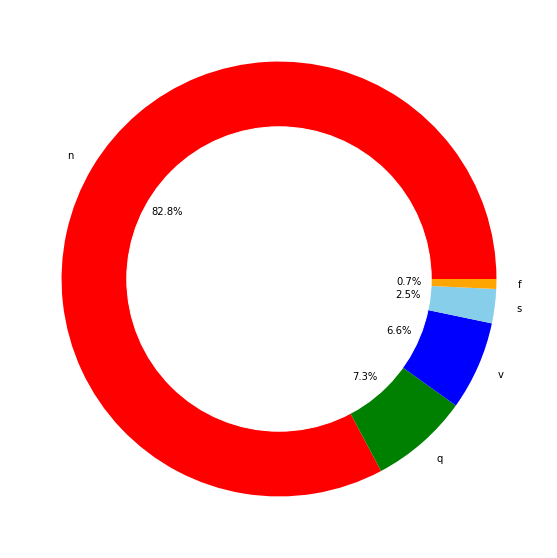

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


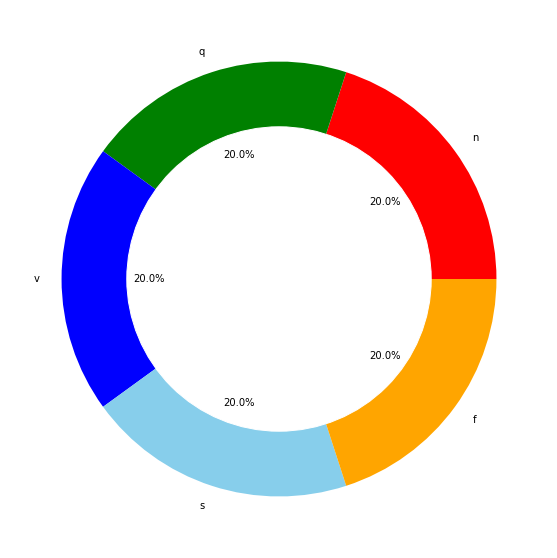

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [ ]:
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
13685,1.000000,0.635897,0.230769,0.358974,0.384615,0.374359,0.364103,0.374359,0.384615,0.394872,0.405128,0.400000,0.405128,0.420513,0.420513,0.415385,0.430769,0.430769,0.441026,0.430769,0.441026,0.446154,0.430769,0.446154,0.456410,0.456410,0.441026,0.425641,0.400000,0.389744,0.384615,0.369231,0.338462,0.297436,0.302564,0.312821,0.287179,0.312821,0.292308,0.276923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73039,0.729167,0.638889,0.121528,0.000000,0.069444,0.131944,0.114583,0.156250,0.208333,0.173611,0.204861,0.208333,0.246528,0.267361,0.281250,0.250000,0.270833,0.302083,0.319444,0.309028,0.333333,0.309028,0.298611,0.298611,0.350694,0.357639,0.350694,0.375000,0.416667,0.388889,0.395833,0.447917,0.493056,0.513889,0.496528,0.500000,0.562500,0.524306,0.447917,0.420139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76939,0.993355,1.000000,0.959025,0.914729,0.928018,0.898117,0.792913,0.612403,0.373200,0.310078,0.318937,0.286822,0.261351,0.255814,0.250277,0.234773,0.224806,0.221484,0.217054,0.205980,0.189369,0.181617,0.174972,0.162791,0.159468,0.160576,0.152824,0.152824,0.143965,0.125138,0.106312,0.078627,0.039867,0.012182,0.000000,0.005537,0.023256,0.050941,0.085271,0.124031,...,0.326689,0.326689,0.330011,0.325581,0.318937,0.316722,0.310078,0.393134,0.598007,0.792913,0.791805,0.539313,0.289037,0.357697,0.37763,0.334441,0.321152,0.325581,0.327796,0.315615,0.311185,0.315615,0.320044,0.316722,0.3134,0.3134,0.316722,0.314507,0.311185,0.317829,0.321152,0.318937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80533,0.878136,1.000000,1.000000,0.650538,0.358423,0.218638,0.170251,0.154122,0.130824,0.121864,0.116487,0.109319,0.105735,0.105735,0.107527,0.096774,0.098566,0.091398,0.091398,0.080645,0.084229,0.078853,0.078853,0.080645,0.084229,0.091398,0.100358,0.111111,0.130824,0.141577,0.157706,0.172043,0.182796,0.188172,0.189964,0.184588,0.182796,0.177419,0.173835,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86894,1.000000,0.766234,0.415584,0.220779,0.123377,0.123377,0.146104,0.159091,0.165584,0.162338,0.103896,0.178571,0.094156,0.097403,0.165584,0.168831,0.071429,0.155844,0.113636,0.113636,0.087662,0.087662,0.123377,0.068182,0.090909,0.094156,0.000000,0.155844,0.159091,0.149351,0.087662,0.113636,0.116883,0.136364,0.142857,0.175325,0.191558,0.201299,0.237013,0.237013,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


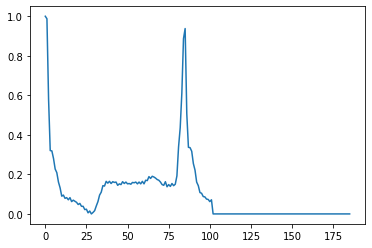

In [ ]:
 plt.plot(c.iloc[0,:186])

In [ ]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


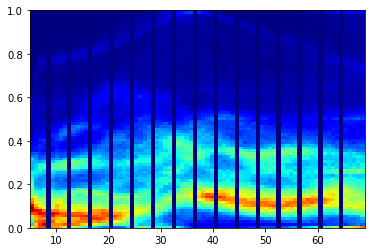

In [ ]:
plot_hist(0,70,5)

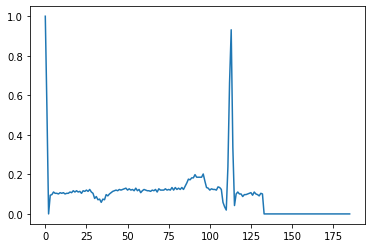

In [ ]:
plt.plot(c.iloc[1,:186])

90000
90000


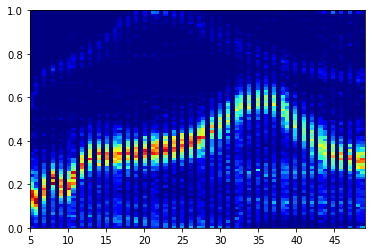

In [ ]:
plot_hist(1,50,5)

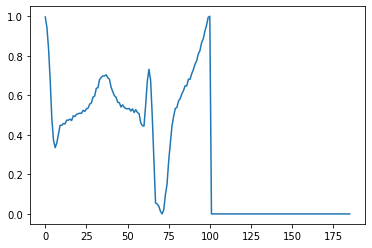

In [ ]:
 plt.plot(c.iloc[2,:186])

60000
60000


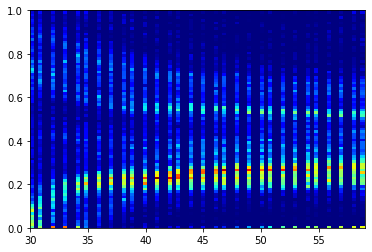

In [ ]:
plot_hist(2,60,30)

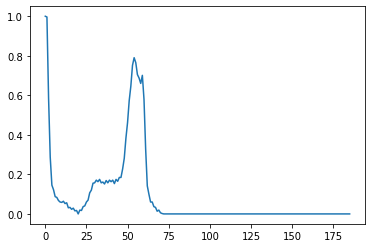

In [ ]:
plt.plot(c.iloc[3,:186])

70000
70000


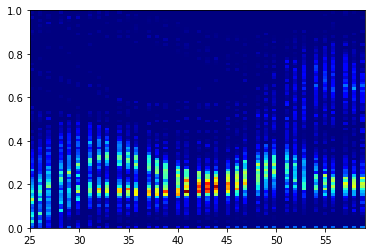

In [ ]:
plot_hist(3,60,25)

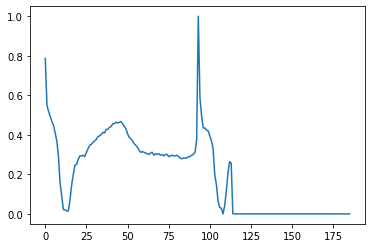

In [ ]:
plt.plot(c.iloc[4,:186])

64000
64000


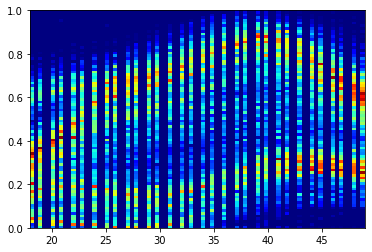

In [ ]:
plot_hist(4,50,18)

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

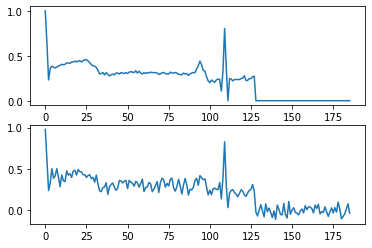

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
#for i in range(len(X_train)):
#    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
print(X_train.shape)

(100000, 186, 1)


In [ ]:
#second model
def network(X_train,y_train,X_test,y_test):
    nclass = 5
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    img_1 = Convolution1D(16, kernel_size=5, activation='relu', padding="valid")(inputs_cnn)
    img_1 = Convolution1D(16, kernel_size=5, activation='relu', padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation='relu', padding="valid")(img_1)
    img_1 = MaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)
    flatten=Flatten()(img_1)
    dense_1 = Dense(64, activation='relu', name="dense_1")(flatten)
    dense_2 = Dense(64, activation='relu', name="dense_2")(dense_1)
    dense_3 = Dense(nclass, activation='softmax', name="dense_3")(dense_1)

    model = Model(inputs=inputs_cnn, outputs=dense_3)
    #opt = optimizers.Adam(0.001)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    #model.summary()
    return (history,model)

In [ ]:
#first model
def network(X_train,y_train,X_test,y_test):
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(64, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(history,model)
    
    #return model

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

#history,model=network(X_train,y_train,X_test,y_test)
history2,model2=network2(X_train,y_train,X_test,y_test)

Train on 100000 samples, validate on 21892 samples
Epoch 1/40
100000/100000 [==============================] - 45s 455us/step - loss: 0.4010 - accuracy: 0.8544 - val_loss: 0.3151 - val_accuracy: 0.8908
Epoch 2/40
100000/100000 [==============================] - 41s 407us/step - loss: 0.1955 - accuracy: 0.9295 - val_loss: 0.2901 - val_accuracy: 0.8882
Epoch 3/40
100000/100000 [==============================] - 40s 404us/step - loss: 0.1450 - accuracy: 0.9490 - val_loss: 0.2123 - val_accuracy: 0.9189
Epoch 4/40
100000/100000 [==============================] - 43s 431us/step - loss: 0.1167 - accuracy: 0.9588 - val_loss: 0.2858 - val_accuracy: 0.9105
Epoch 5/40
100000/100000 [==============================] - 42s 415us/step - loss: 0.1003 - accuracy: 0.9649 - val_loss: 0.1958 - val_accuracy: 0.9296
Epoch 6/40
100000/100000 [==============================] - 42s 419us/step - loss: 0.0860 - accuracy: 0.9705 - val_loss: 0.1595 - val_accuracy: 0.9445
Epoch 7/40
100000/100000 [=================

In [ ]:
#model.summary()
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 186, 1)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 182, 16)           96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 178, 16)           1296      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 89, 16)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 89, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 87, 32)            1568      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 85, 32)            3104

Accuracy: 96.05%


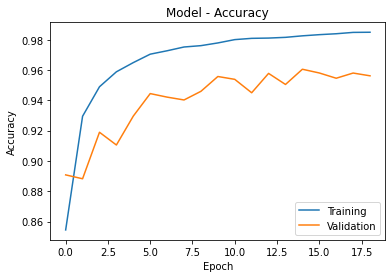

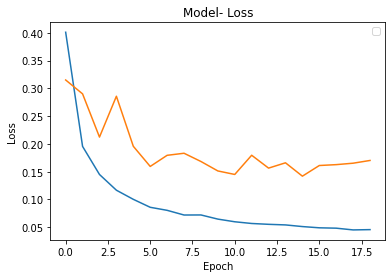

In [ ]:
#evaluate_model(history,X_test,y_test,model)
#y_pred=model.predict(X_test) 
evaluate_model(history2,X_test,y_test,model2)
y_pred=model2.predict(X_test) 

Normalized confusion matrix


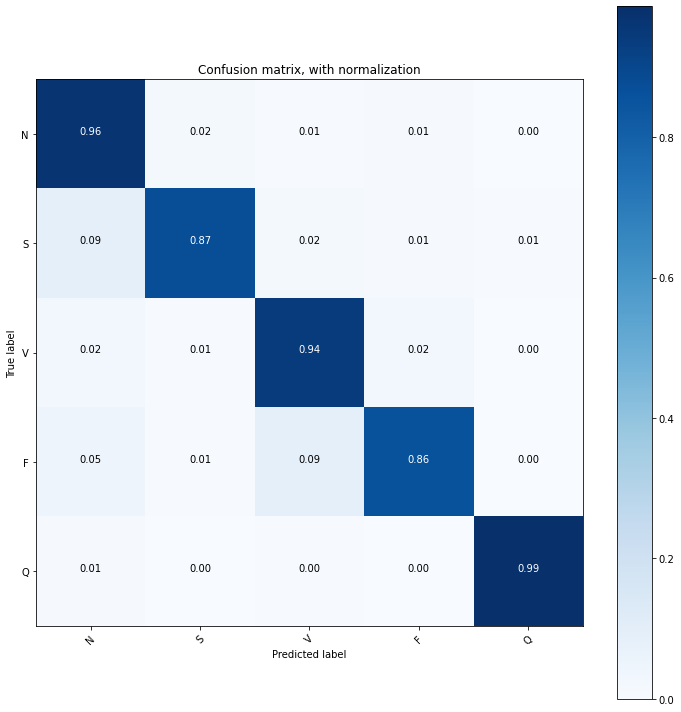

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()